<a href="https://colab.research.google.com/github/vineelabaisa9119/LINEARREGRESSION/blob/main/linearregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#creating a data frame
import pandas as pd

#creating an empty dataframe
df=pd.DataFrame()
print(df)

Empty DataFrame
Columns: []
Index: []


In [2]:
#initialize list elements
data=[0.2,0.4,0.6,0.8]

df=pd.DataFrame(data,columns=['Bacteria_size'])
df['Max_growth']=[3.4,3.8,4.2,4.6]
df

,Bacteria_size,Max_growth
0,0.2,3.4
1,0.4,3.8
2,0.6,4.2
3,0.8,4.6


In [3]:
#splitting the data
x_train = df.iloc[:3,:-1]
y_train = df.iloc[:3,-1:]
x_test = df.iloc[3:,:-1]
y_test = df.iloc[:3,-1:]

In [4]:
y_train

,Max_growth
0,3.4
1,3.8
2,4.2


In [5]:
x_train

,Bacteria_size
0,0.2
1,0.4
2,0.6


In [6]:
x_test

,Bacteria_size
3,0.8


In [7]:
y_test

,Max_growth
0,3.4
1,3.8
2,4.2


In [8]:
import sympy as sym
from sympy import *

In [12]:
#step1 :initialize model parameters
mi=1
ci=-1
n=0.01
epochs=200
iter=1

ns=len(x_train)
#print(ns)
y=1
m=1
x=1
c=1
#step 2 :start iteration
for iter in range(1,epochs+1):
  print("ITERATION:{}".format(iter))
  print("++++++++++++++++++++++++++++++++++")
#step 3 track samples
  for sample in range(0,ns):
    xa=x_train['Bacteria_size'][sample]#0.2
    ya=y_train['Max_growth'][sample] #3.4
    print("--->sample {}".format(sample+1)+"x={}".format(xa)+"y={}".format(ya))
#step 4:calculate the Gradient
    E = (0.5)*(y-m*x-c)**2 #error function
    x=sym.Symbol('x')
    y=sym.Symbol('y')
    m=sym.Symbol('m')
    c=sym.Symbol('c')
    deltaE_m=sym.diff(E,m)
    deltaE_c=sym.diff(E,c)
    #substituting values
  deltaE_m=deltaE_m.subs(m,mi)
  deltaE_m=deltaE_m.subs(c,ci)
  deltaE_m=deltaE_m.subs(x,xa)
  deltaE_m=deltaE_m.subs(y,ya)
  deltaE_c=deltaE_m.subs(m,mi)
  deltaE_c=deltaE_m.subs(c,ci)
  deltaE_c=deltaE_m.subs(x,xa)
  deltaE_c=deltaE_m.subs(y,ya)
  print("Obtained gradient wrto m and c:")
  print('deltaE_m:',deltaE_m)
  print('deltaE_c:',deltaE_c)
  #step5:calculate the step length -change
  del_m=-n*deltaE_m
  del_c=-n*deltaE_c
  #step 6: updating the model parameters
  mi+=del_m
  ci+=del_c
  print("m: {}".format(mi)+"c:{}".format(ci))
  print("--------------------------------------------------")
  print("optimal values")
  print('m={}'.format(mi))
  print('c={}'.format(ci))

ITERATION:1
++++++++++++++++++++++++++++++++++
--->sample 1x=0.2y=3.4
--->sample 2x=0.4y=3.8
--->sample 3x=0.6y=4.2
Obtained gradient wrto m and c:
deltaE_m: -2.76000000000000
deltaE_c: -2.76000000000000
m: 1.02760000000000c:-0.972400000000000
--------------------------------------------------
optimal values
m=1.02760000000000
c=-0.972400000000000
ITERATION:2
++++++++++++++++++++++++++++++++++
--->sample 1x=0.2y=3.4
--->sample 2x=0.4y=3.8
--->sample 3x=0.6y=4.2
Obtained gradient wrto m and c:
deltaE_m: -2.73350400000000
deltaE_c: -2.73350400000000
m: 1.05493504000000c:-0.945064960000000
--------------------------------------------------
optimal values
m=1.05493504000000
c=-0.945064960000000
ITERATION:3
++++++++++++++++++++++++++++++++++
--->sample 1x=0.2y=3.4
--->sample 2x=0.4y=3.8
--->sample 3x=0.6y=4.2
Obtained gradient wrto m and c:
deltaE_m: -2.70726236160000
deltaE_c: -2.70726236160000
m: 1.08200766361600c:-0.917992336384000
--------------------------------------------------
optim

In [13]:
y_train_pred=[]
for i in range(0,len(x_train)):
    y_cal = mi*x_train['Bacteria_size'][i]+ci
    y_train_pred.append(y_cal)
y_train_pred

[2.14887573730384, 2.84035502685448, 3.53183431640512]

In [14]:
x_train_list=list(x_train['Bacteria_size'])
x_train_list

[0.2, 0.4, 0.6]

In [15]:
y_train_list=list(y_train['Max_growth'])
y_train_list

[3.4, 3.8, 4.2]

In [17]:
Error=[]
for i in range(0,len(x_train)):
    err=(y_train_list[i]-y_train_pred[i])
    Error.append(err)
Error

[1.25112426269616, 0.959644973145519, 0.668165683594879]

Text(0, 0.5, 'y values')

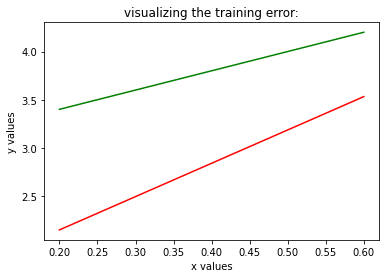

In [18]:
import matplotlib.pyplot as plt
plt.plot(x_train_list,y_train_list,label='y_actual',color='green')
plt.plot(x_train_list,y_train_pred,label='y_predicted',color='red')
#Add labels and title
plt.title("visualizing the training error:")
plt.xlabel("x values")
plt.ylabel("y values")